In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_rbko_strategy import (
    TSMyoRBKOStrategy,
)
from datetime import datetime

In [3]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine.add_strategy(TSMyoRBKOStrategy, {'enter_coef_1': 1.07, 'enter_coef_2': 0.07, 'setup_coef': 0.25, 'break_coef':0.2, 'multiplier':2})

2019-12-14 22:00:44.022727	开始加载历史数据
2019-12-14 22:00:44.247138	加载进度： [1%]
2019-12-14 22:00:44.599953	加载进度： [2%]
2019-12-14 22:00:44.928902	加载进度： [4%]
2019-12-14 22:00:45.189622	加载进度： [5%]
2019-12-14 22:00:45.524885	加载进度： [6%]
2019-12-14 22:00:45.830007	加载进度： [7%]
2019-12-14 22:00:46.228887	加载进度： [8%]
2019-12-14 22:00:46.543125	加载进度： [9%]
2019-12-14 22:00:46.852980	加载进度：# [11%]
2019-12-14 22:00:47.188307	加载进度：# [12%]
2019-12-14 22:00:47.485448	加载进度：# [13%]
2019-12-14 22:00:47.825295	加载进度：# [14%]
2019-12-14 22:00:48.207003	加载进度：# [15%]
2019-12-14 22:00:48.440214	加载进度：# [16%]
2019-12-14 22:00:48.767017	加载进度：# [18%]
2019-12-14 22:00:49.177263	加载进度：# [19%]
2019-12-14 22:00:49.463225	加载进度：# [20%]
2019-12-14 22:00:49.711797	加载进度：## [21%]
2019-12-14 22:00:50.151456	加载进度：## [22%]
2019-12-14 22:00:50.476259	加载进度：## [23%]
2019-12-14 22:00:50.752639	加载进度：## [25%]
2019-12-14 22:00:50.985724	加载进度：## [26%]
2019-12-14 22:00:51.440149	加载进度：## [27%]
2019-12-14 22:00:51.758990	加载进度：## [28%]
2019-12-14 22

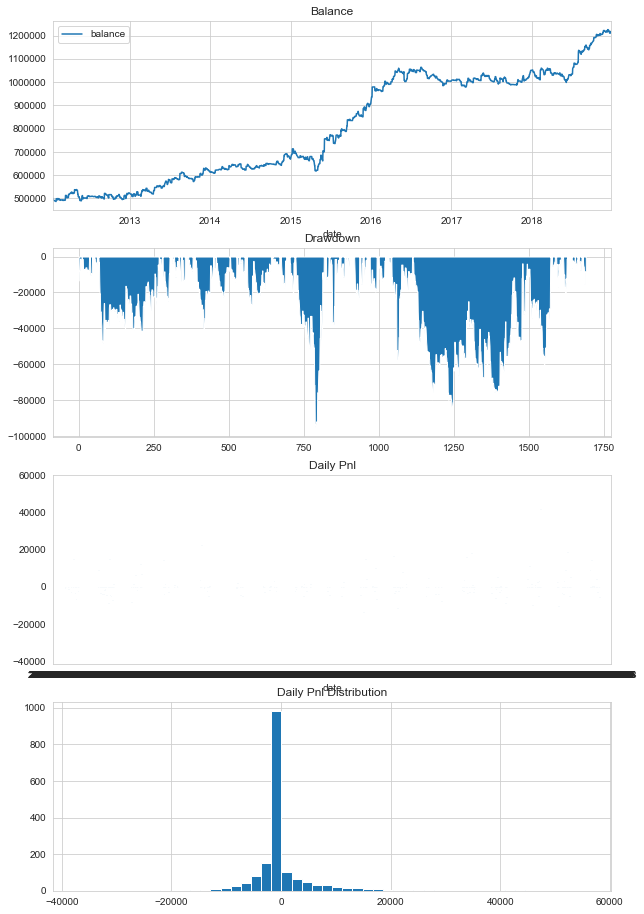

In [4]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [16]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("setup_coef", 0.18, 0.26, 0.01) #0.25
setting.add_parameter("break_coef", 0.15, 0.25, 0.01) #0.2
#setting.add_parameter("enter_coef_1", 0.1, 1.14, 0.07) #1.07
#setting.add_parameter("enter_coef_2", 0.05, 0.08, 0.01) #0.07

engine.run_optimization(setting)

2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.25000000000000006, 'break_coef': 0.24000000000000007}, 目标：1.3013447181623774
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.24000000000000005, 'break_coef': 0.24000000000000007}, 目标：1.3013401786194854
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.23000000000000004, 'break_coef': 0.16}, 目标：1.2798424718189914
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.24000000000000005, 'break_coef': 0.15}, 目标：1.2736753892241486
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.24000000000000005, 'break_coef': 0.20000000000000004}, 目标：1.264791932404008
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.19, 'break_coef': 0.16}, 目标：1.2638707662495856
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.23000000000000004, 'break_coef': 0.21000000000000005}, 目标：1.2576311531474555
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.18, 'break_coef': 0.18000000000000002}, 目标：1.2520190678504601
2019-12-13 15:56:50.700969	参数：{'setup_coef': 0.2, 'break_coef': 0.15}, 目标：1.25024514

[("{'setup_coef': 0.25000000000000006, 'break_coef': 0.24000000000000007}",
  1.3013447181623774,
  {'start_date': datetime.date(2014, 1, 16),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 1210,
   'profit_days': 255,
   'loss_days': 309,
   'capital': 500000,
   'end_balance': 1006898.8903999953,
   'max_drawdown': -108883.86900000181,
   'max_ddpercent': -12.605266165619893,
   'max_drawdown_duration': 469,
   'total_net_pnl': 506898.8903999949,
   'daily_net_pnl': 418.92470280991313,
   'total_commission': 73541.1096,
   'daily_commission': 60.777776528925614,
   'total_slippage': 143400.0,
   'daily_slippage': 118.51239669421487,
   'total_turnover': 2451370320.0,
   'daily_turnover': 2025925.8842975206,
   'total_trade_count': 2390,
   'daily_trade_count': 1.975206611570248,
   'total_return': 101.37977807999907,
   'annual_return': 20.10838573487585,
   'daily_return': 0.05832719150180277,
   'return_std': 0.6943594211886472,
   'sharpe_ratio': 1.3013447181623774,


2019-12-13 16:06:28.742783	开始加载历史数据
2019-12-13 16:06:28.742783	加载进度： [10%]
2019-12-13 16:06:28.742783	加载进度：# [20%]
2019-12-13 16:06:28.742783	加载进度：## [30%]
2019-12-13 16:06:28.742783	加载进度：### [39%]
2019-12-13 16:06:28.743784	加载进度：#### [49%]
2019-12-13 16:06:28.743784	加载进度：##### [59%]
2019-12-13 16:06:28.743784	加载进度：###### [69%]
2019-12-13 16:06:28.743784	加载进度：####### [79%]
2019-12-13 16:06:28.743784	加载进度：######## [89%]
2019-12-13 16:06:28.743784	加载进度：######### [99%]
2019-12-13 16:06:28.743784	加载进度：########## [100%]
2019-12-13 16:06:28.743784	历史数据加载完成，数据量：48240
2019-12-13 16:06:28.783385	策略初始化完成
2019-12-13 16:06:28.783385	开始回放历史数据
2019-12-13 16:06:30.127616	历史数据回放结束
2019-12-13 16:06:30.127616	开始计算逐日盯市盈亏
2019-12-13 16:06:30.131619	逐日盯市盈亏计算完成
2019-12-13 16:06:30.131619	开始计算策略统计指标
2019-12-13 16:06:30.138626	------------------------------
2019-12-13 16:06:30.138626	首个交易日：	2019-01-16
2019-12-13 16:06:30.138626	最后交易日：	2019-10-31
2019-12-13 16:06:30.138626	总交易日：	191
2019-12-13 16:06:30.138626	

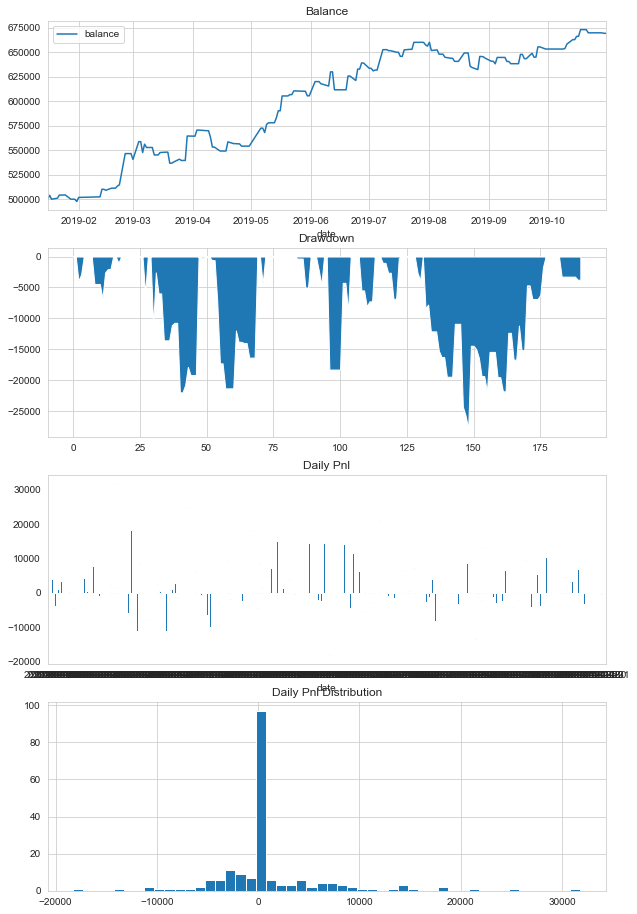

In [22]:
#%%
#%%
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2019, 1, 1),
    end=datetime(2019, 11, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'enter_coef_1': 1.07, 'enter_coef_2': 0.07, 'setup_coef': 0.25, 'break_coef':0.2, 'multiplier':2})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()